import the needed libraries

In [27]:
#visualize the graph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np
import seaborn as sns


Load the csv

In [28]:
df = pd.read_csv('citations.csv')



create unweighted graph

In [29]:
G=nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.DiGraph())

visualize the graph

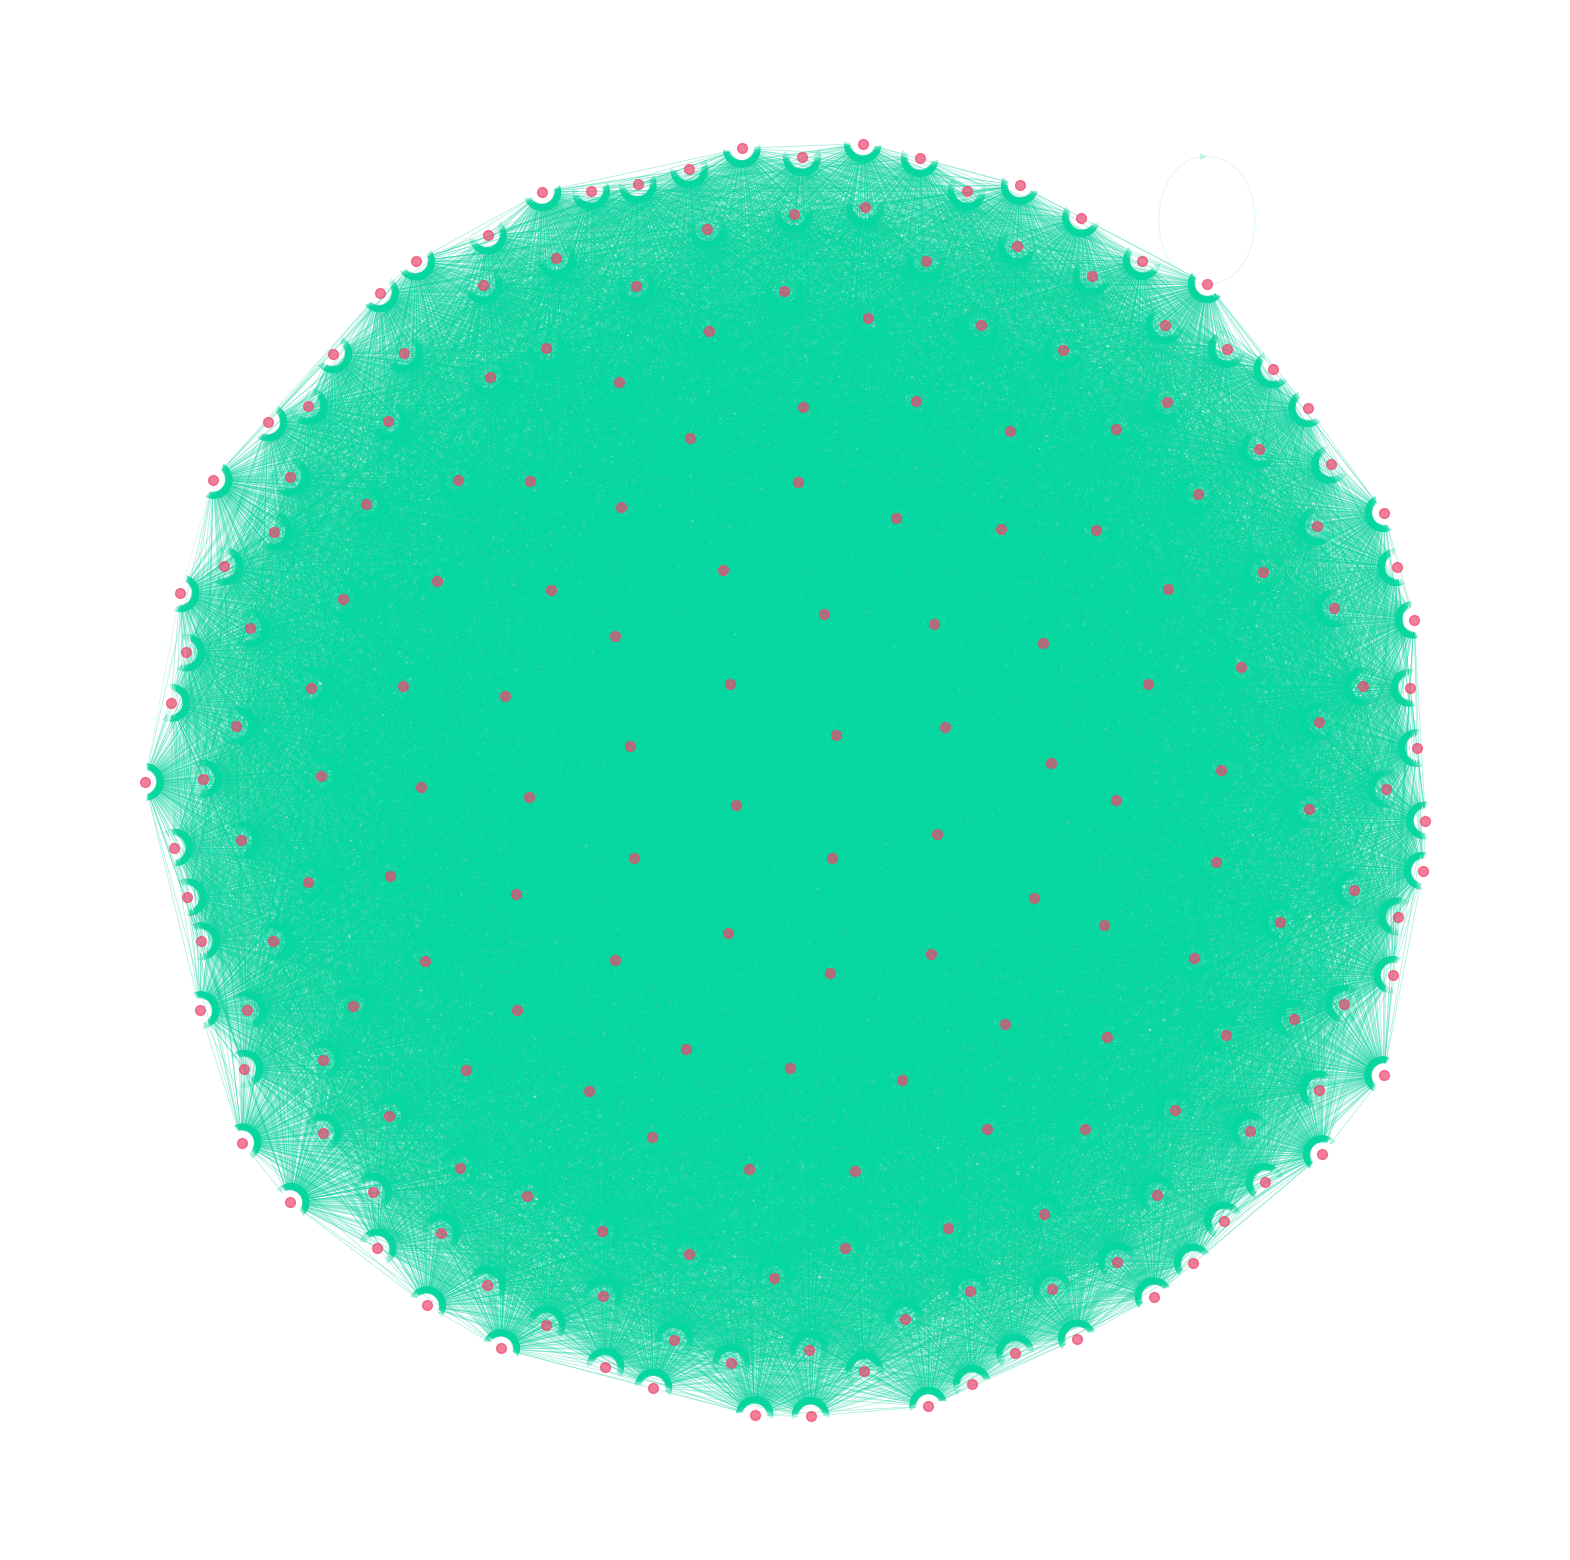

In [30]:

degrees = dict(G.degree())
to_keep = [n for n in degrees if degrees[n] > 2]  # Keep nodes with more than 2 connections
G = G.subgraph(to_keep)

# Now let's work with a smaller subgraph for a clearer visualization
subgraph_nodes = sorted(degrees, key=degrees.get, reverse=True)[:200]  # Take top 200 nodes
H = G.subgraph(subgraph_nodes)

# Use Kamada-Kawai layout which may provide better spacing for large graphs
pos = nx.kamada_kawai_layout(H)

# Draw the network
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(H, pos, node_size=50, node_color='#EF476F', alpha=0.7)  # Smaller node size
nx.draw_networkx_edges(H, pos, edge_color='#06D6A0', alpha=0.2, width=0.5)  # Thin and semi-transparent edges

plt.axis('off')
plt.show()

adding the personalized pagerank 

In [31]:
top_degree_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]
top_degree_nodes

[('7YJy2IQM3PUJ', 968),
 ('mIN_tM0XxXoJ', 951),
 ('9X5Yfu15VVcJ', 936),
 ('dR4_JkIKW8EJ', 934),
 ('z0Yvmw6Nt-8J', 931),
 ('mF2Kk0p-WNkJ', 929),
 ('6xG-8prO3H4J', 928),
 ('qr6rg-l2spgJ', 927),
 ('RjRl5rp83IwJ', 926),
 ('BOeFIv2QB98J', 924),
 ('A668yB0MBFwJ', 924),
 ('Dw1Jr-P3OLYJ', 924),
 ('kWCO-ADQwtYJ', 923),
 ('JVB_ceQ9VysJ', 923),
 ('2KV36-LK7QIJ', 923),
 ('dc3jZFYgmf0J', 923),
 ('Xh49uWighUcJ', 923),
 ('qH2nNk7LUq0J', 922),
 ('dpPyONb4lAwJ', 922),
 ('Ws4O6B6pHREJ', 922)]

In [32]:
simple_pagerank = nx.pagerank(G, alpha=0.85)

personalization_dict = {node: 1/len(top_degree_nodes) for node, degree in top_degree_nodes}

personalized_pagerank = nx.pagerank(G, alpha=0.85, personalization=personalization_dict)



In [33]:
df_metrics = pd.DataFrame(dict(
    simple_pagerank = simple_pagerank,
    personalized_pagerank = personalized_pagerank,))
df_metrics.index.name='case id'
df_metrics

,simple_pagerank,personalized_pagerank
case id,,
qH2nNk7LUq0J,0.002318,0.009491
U6elx8mYkL4J,0.002318,0.002006
kWCO-ADQwtYJ,0.002318,0.009491
cR3BW4nVvwoJ,0.002318,0.002006
7oJcOnQz8QYJ,0.002318,0.002006
...,...,...
p8sBfgjmc44J,0.001367,0.001095
uSrZMaNnTXgJ,0.001293,0.000943
yoZxNbDWow8J,0.001356,0.000999


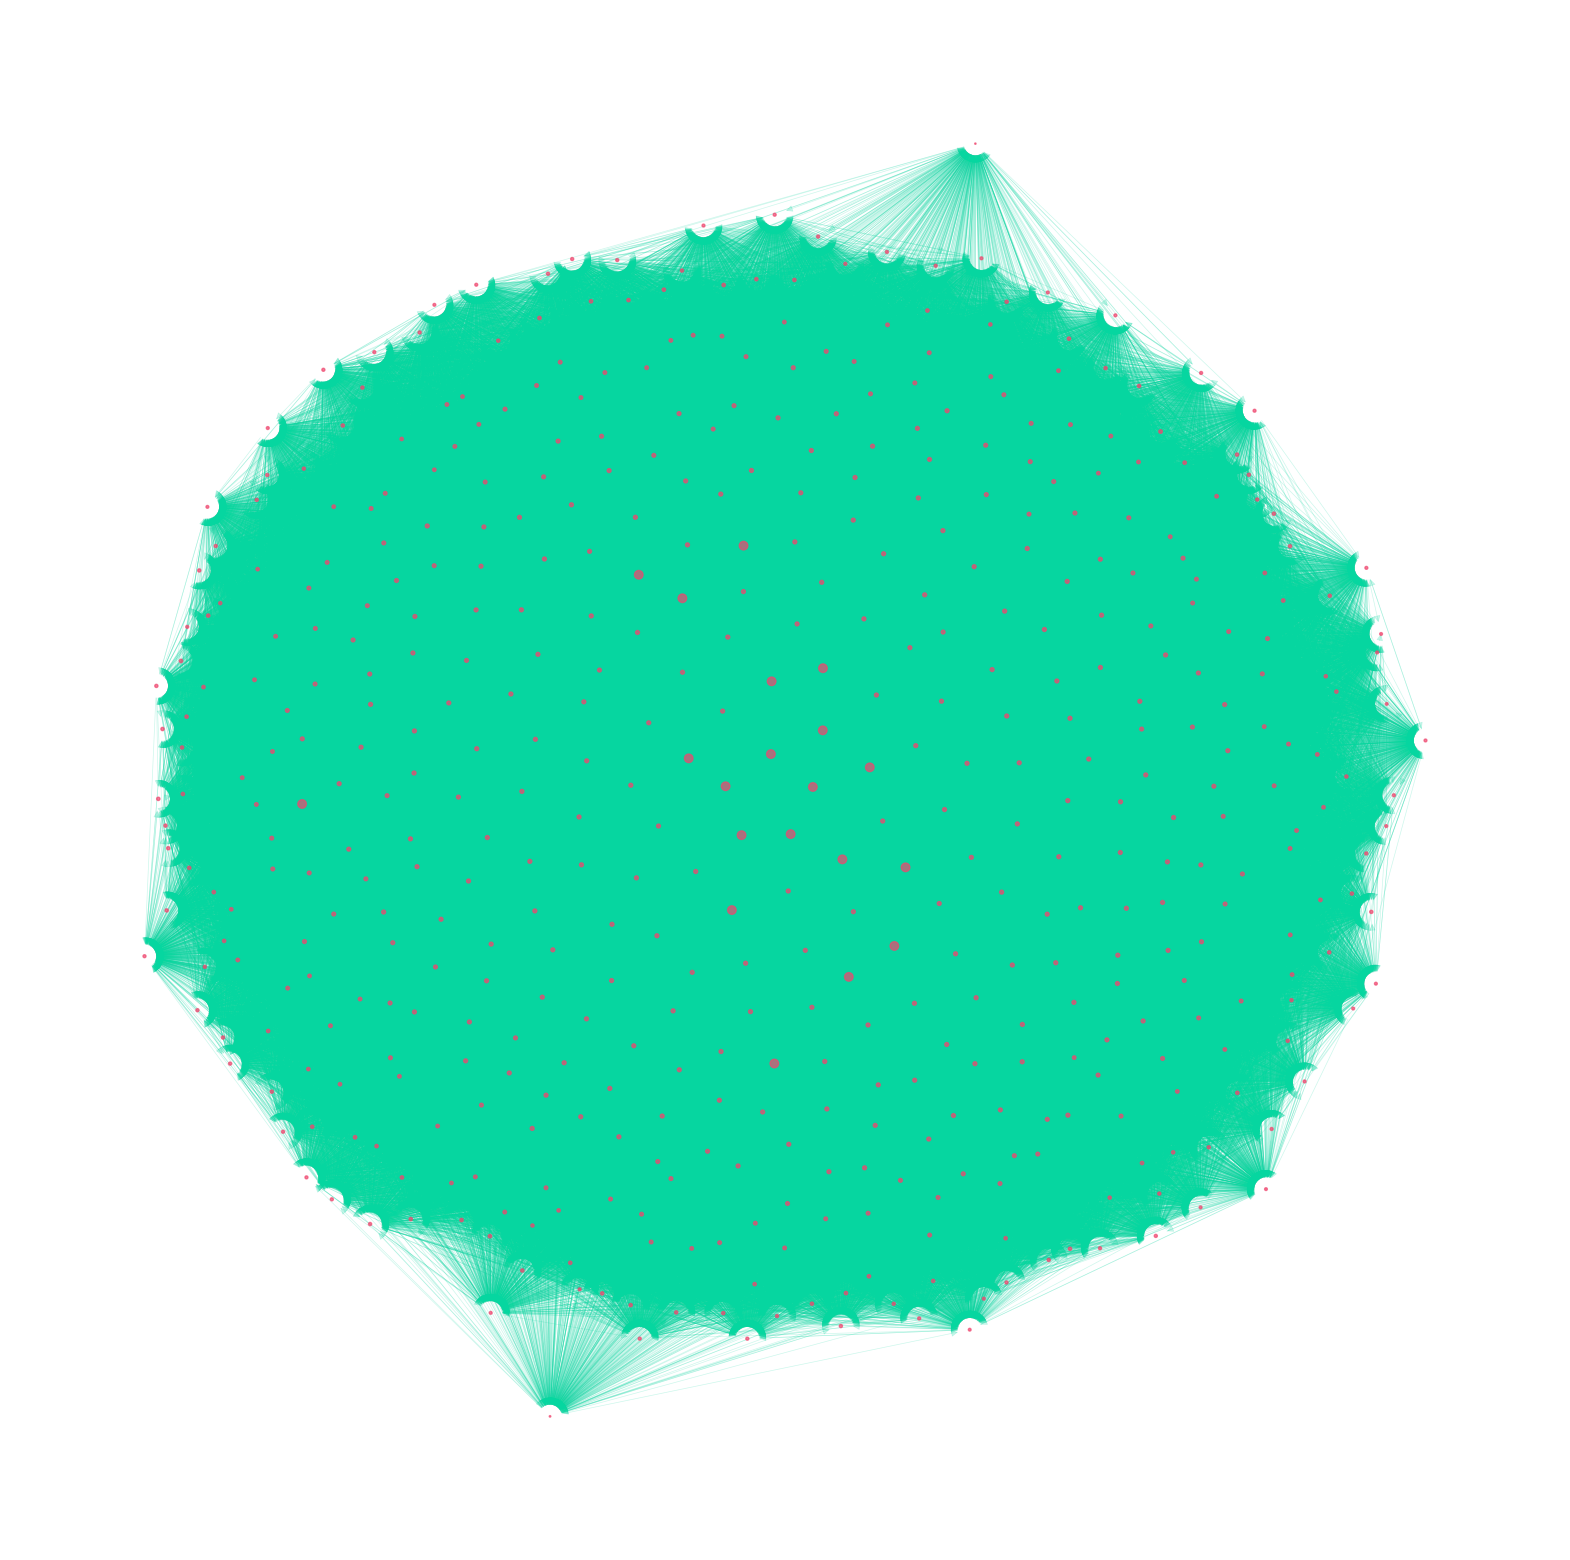

In [36]:
node_size = [i * 4000 for i in df_metrics['personalized_pagerank'].to_list()]
degrees = dict(G.degree())
to_keep = [n for n in degrees if degrees[n] > 2]  # Keep nodes with more than 2 connections
G = G.subgraph(to_keep)

# Now let's work with a smaller subgraph for a clearer visualization
subgraph_nodes = sorted(degrees, key=degrees.get, reverse=True)[:496]  # Take top 200 nodes
H = G.subgraph(subgraph_nodes)

# Use Kamada-Kawai layout which may provide better spacing for large graphs
pos = nx.kamada_kawai_layout(H)

# Draw the network
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(H, pos, node_size=node_size, node_color='#EF476F', alpha=0.7)  # Smaller node size
nx.draw_networkx_edges(H, pos, edge_color='#06D6A0', alpha=0.2, width=0.5)  # Thin and semi-transparent edges

plt.axis('off')
plt.show()

visualizing personalized pagerank distribution

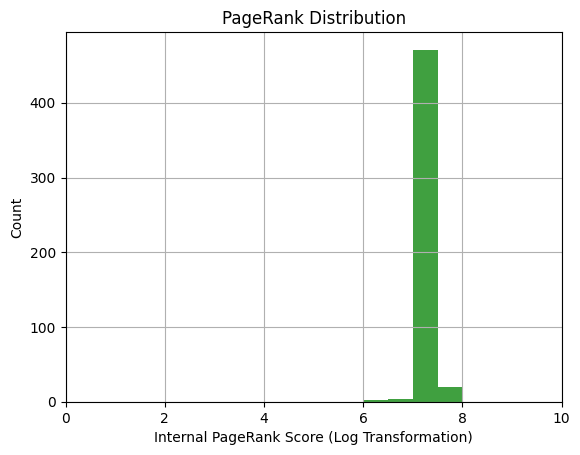

In [37]:
df_metrics['internal_pagerank_score'] = np.clip(np.round(np.log10(df_metrics['personalized_pagerank']) +10, decimals=2), 0, 10)

bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
n, bins, patches = plt.hist(list(df_metrics['internal_pagerank_score']), bins, facecolor='g', alpha=0.75)
plt.xlabel('Internal PageRank Score (Log Transformation)')
plt.ylabel('Count')
plt.title('PageRank Distribution')
plt.xlim(0, 10)
#plt.yscale('log')
plt.grid(True)
plt.show()

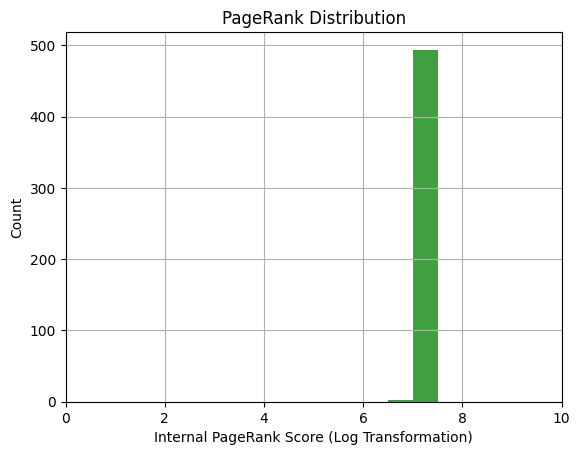

In [38]:
df_metrics['internal_pagerank_score'] = np.clip(np.round(np.log10(df_metrics['simple_pagerank']) +10, decimals=2), 0, 10)

bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5]
n, bins, patches = plt.hist(list(df_metrics['internal_pagerank_score']), bins, facecolor='g', alpha=0.75)
plt.xlabel('Internal PageRank Score (Log Transformation)')
plt.ylabel('Count')
plt.title('PageRank Distribution')
plt.xlim(0, 10)
#plt.yscale('log')
plt.grid(True)
plt.show()

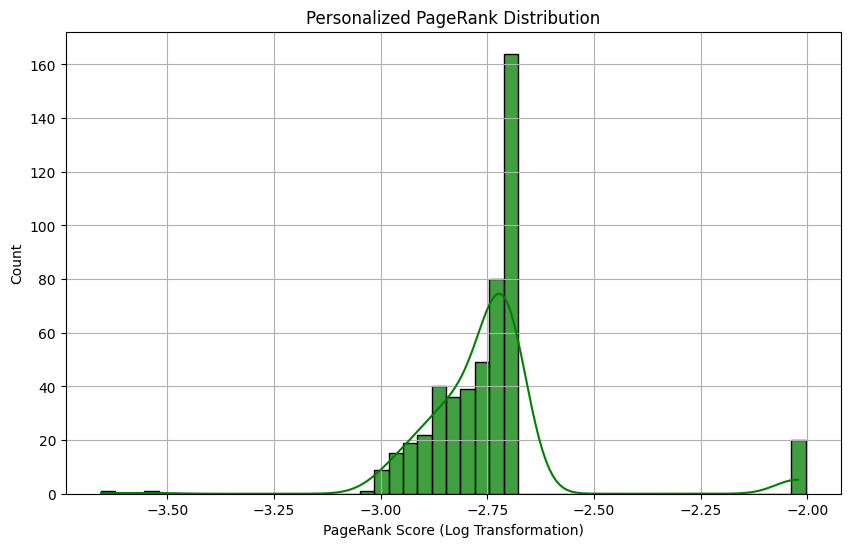

In [39]:

# Assuming df_metrics['personalized_pagerank'] is already computed and valid

# Apply log transformation
df_metrics['log_pagerank'] = np.log10(df_metrics['personalized_pagerank'])

# Find the interquartile range to limit the range of bins
Q1 = df_metrics['log_pagerank'].quantile(0.25)
Q3 = df_metrics['log_pagerank'].quantile(0.75)
IQR = Q3 - Q1
bin_width = 2 * IQR / (len(df_metrics['log_pagerank']) ** (1/3))  # Freedman-Diaconis rule
bin_range = np.arange(df_metrics['log_pagerank'].min(), df_metrics['log_pagerank'].max() + bin_width, bin_width)

# Plot histogram with the new bins
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['log_pagerank'], bins=bin_range, kde=True, color='green', alpha=0.75)

plt.xlabel('PageRank Score (Log Transformation)')
plt.ylabel('Count')
plt.title('Personalized PageRank Distribution')
plt.grid(True)

plt.show()

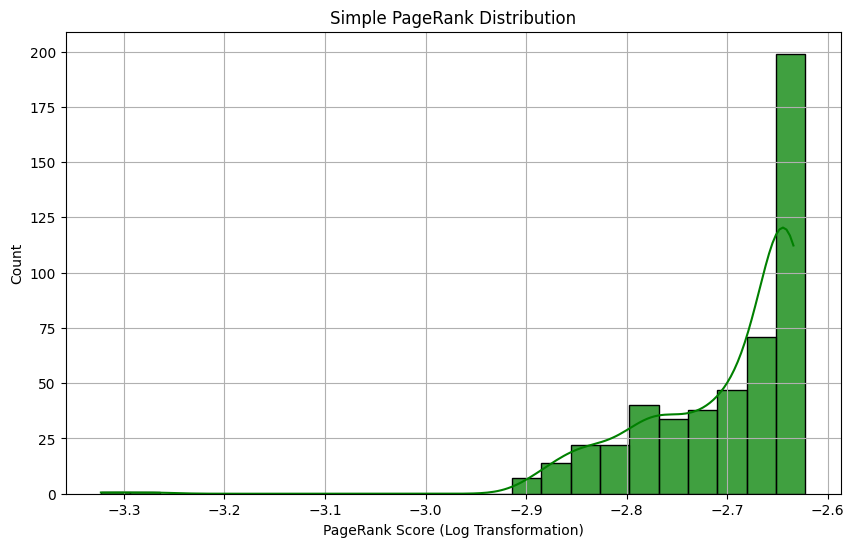

In [40]:

# Apply log transformation
df_metrics['log_pagerank'] = np.log10(df_metrics['simple_pagerank'])

# Find the interquartile range to limit the range of bins
Q1 = df_metrics['log_pagerank'].quantile(0.25)
Q3 = df_metrics['log_pagerank'].quantile(0.75)
IQR = Q3 - Q1
bin_width = 2 * IQR / (len(df_metrics['log_pagerank']) ** (1/3))  # Freedman-Diaconis rule
bin_range = np.arange(df_metrics['log_pagerank'].min(), df_metrics['log_pagerank'].max() + bin_width, bin_width)

# Plot histogram with the new bins
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['log_pagerank'], bins=bin_range, kde=True, color='green', alpha=0.75)

plt.xlabel('PageRank Score (Log Transformation)')
plt.ylabel('Count')
plt.title('Simple PageRank Distribution')
plt.grid(True)

plt.show()

Finally, lets save the data for further analysis

In [44]:
df_metrics = df_metrics.drop(columns=['simple_pagerank'])
df_metrics.to_csv('custom-pagerank.csv')
df_metrics

KeyError: "['simple_pagerank'] not found in axis"